### Name : VANSH KOLTE
### Branch : AIML - C
### Roll No : 62
### Date : 30-07-24
### Machine Learning Practical 1

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
# Load the dataset
file_path = 'titanic.csv'
df = pd.read_csv(file_path)

#### 1. Perform basic EDA using functions like head(), tail(), describe(), shape.

In [4]:
# Display basic statistics of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Display the shape of the dataset
df.shape

(891, 12)

In [6]:
# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Display the last few rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### 2. Identify & handle missing value

In [8]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill missing values in 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop the 'Cabin' column due to high number of missing values
df.drop(columns=['Cabin'], inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()

missing_values_after

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\43130351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


KeyError: "['Cabin'] not found in axis"

#### 3. Check for duplicates and handle it. 

In [13]:
# Check for duplicates
print("Duplicates:\n", df.duplicated().sum())

# Handle duplicates
df.drop_duplicates(inplace=True)

Duplicates:
 116


In [14]:
# Remove unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

#### 4. Identify outliers & handle it.

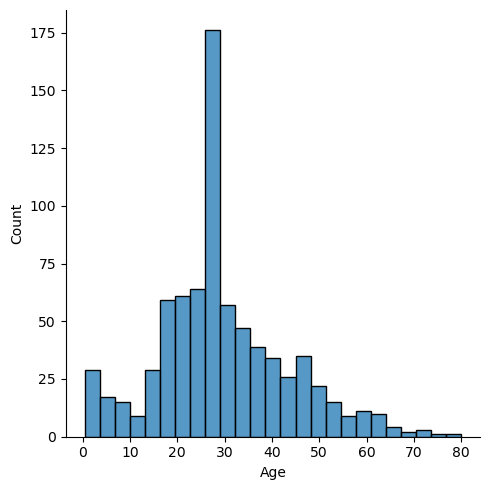

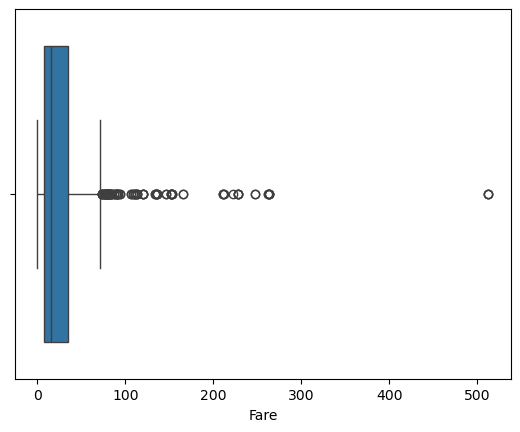

NameError: name 'titanic_df' is not defined

In [15]:
# Visualize outliers in 'Age' and 'Fare' columns
sns.displot(x=df['Age'])
plt.show()

sns.boxplot(x=df['Fare'])
plt.show()

# Handle outliers (example: capping outliers)
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

df['Age'] = cap_outliers(titanic_df['Age'])
df['Fare'] = cap_outliers(titanic_df['Fare'])

#### 5. Apply data encoding technique on suitable attribute.

In [16]:
# Apply data encoding on suitable attribute
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [83]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,NaN,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


#### 6. Apply Univariate, Bivariate & Multivariate analysis

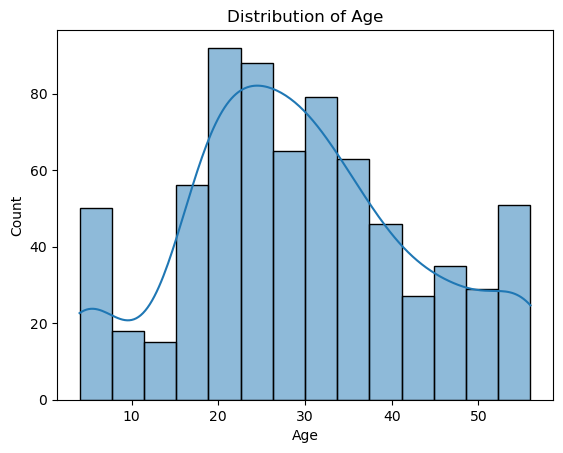

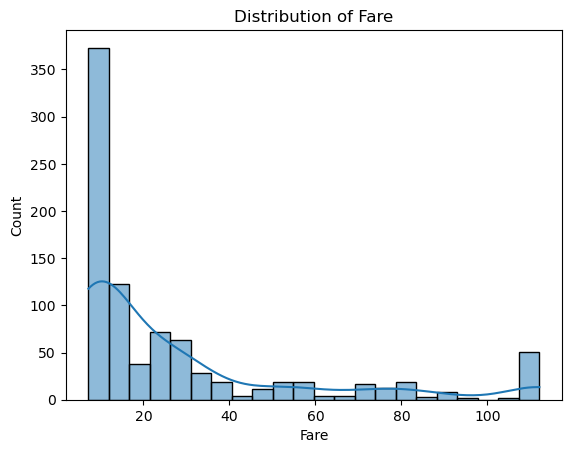

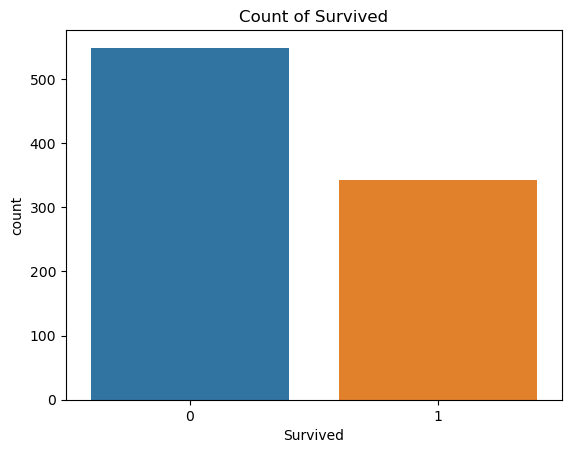

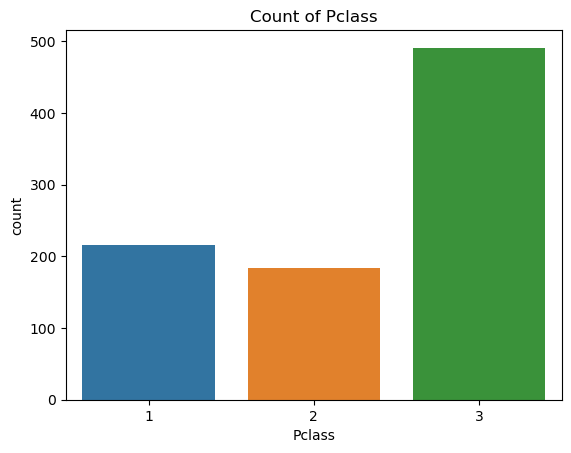

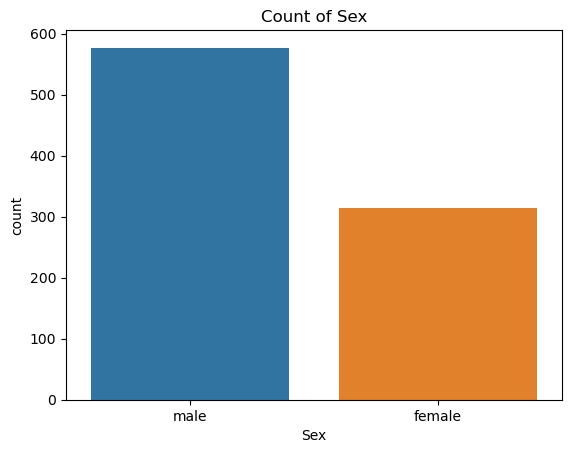

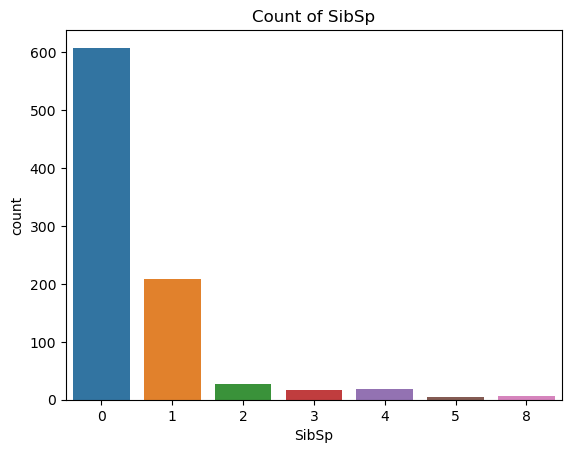

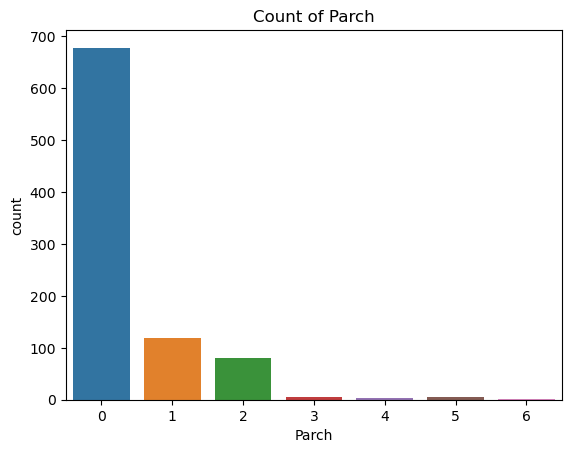

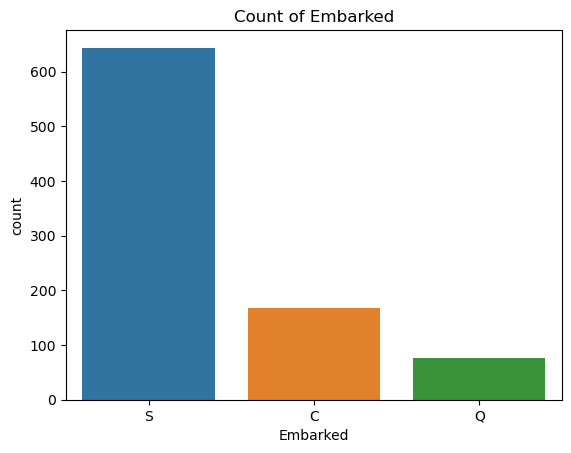

In [84]:
# Univariate Analysis for numerical variables
def univariate_analysis_numerical(df, column):
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Univariate Analysis for categorical variables
def univariate_analysis_categorical(df, column):
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.show()

# Perform univariate analysis on numerical variables
numerical_columns = ['Age', 'Fare']
for column in numerical_columns:
    univariate_analysis_numerical(titanic_df, column)

# Perform univariate analysis on categorical variables
categorical_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for column in categorical_columns:
    univariate_analysis_categorical(titanic_df, column)

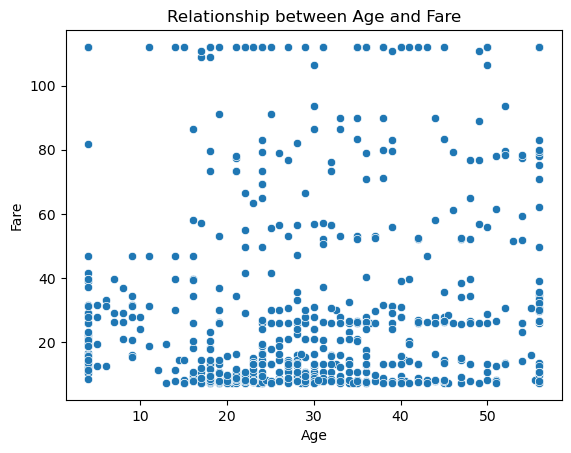

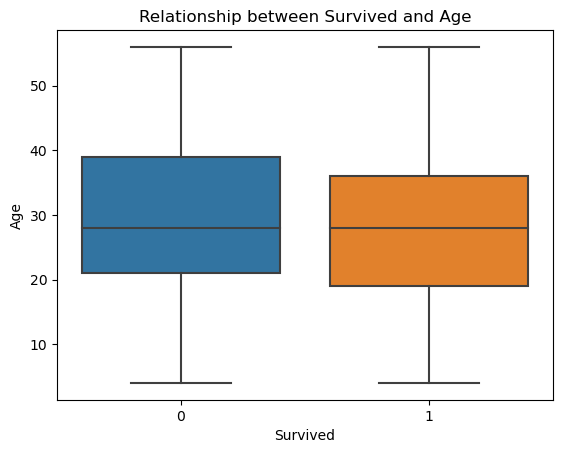

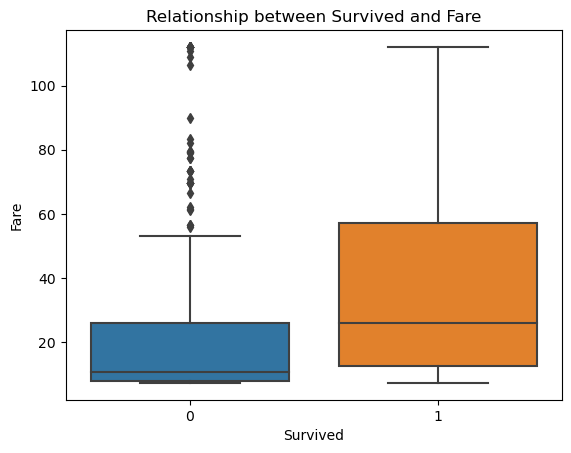

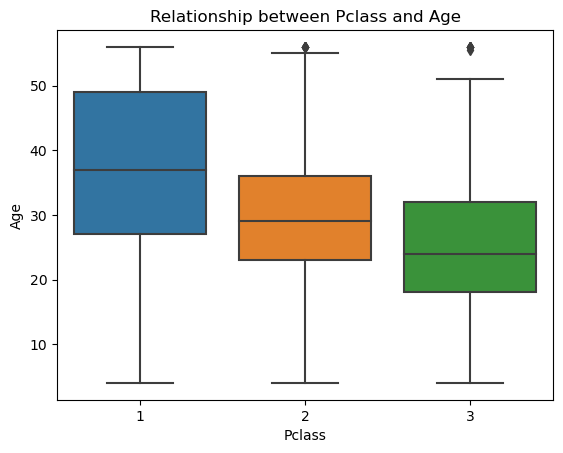

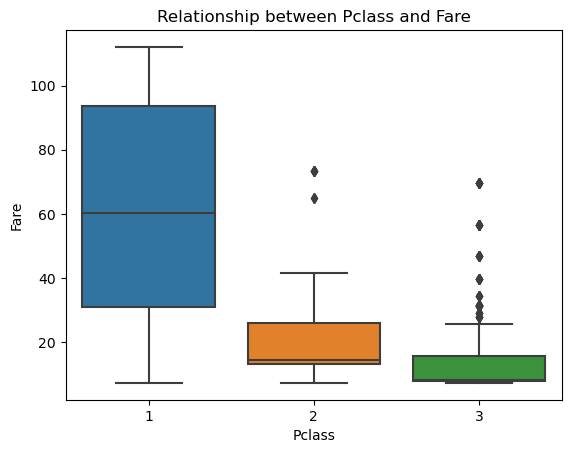

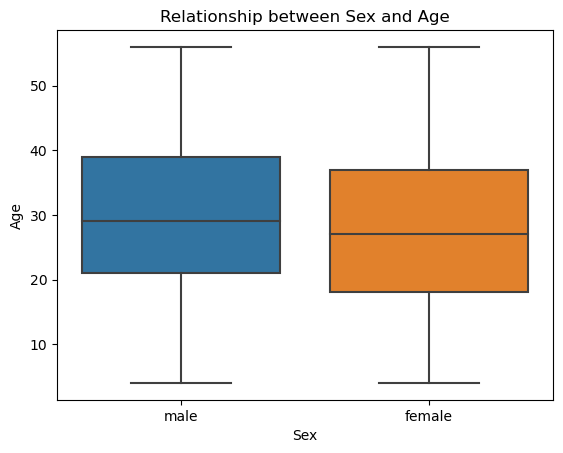

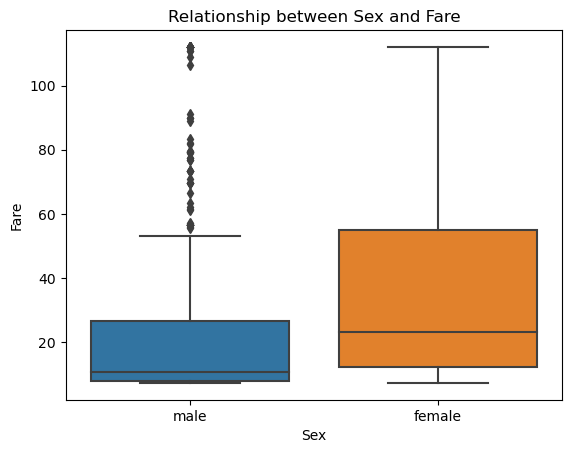

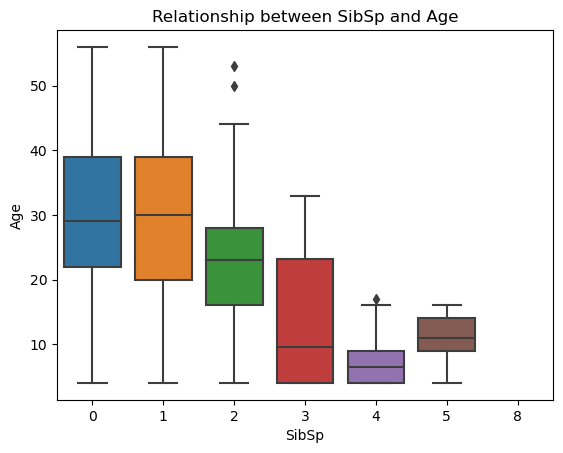

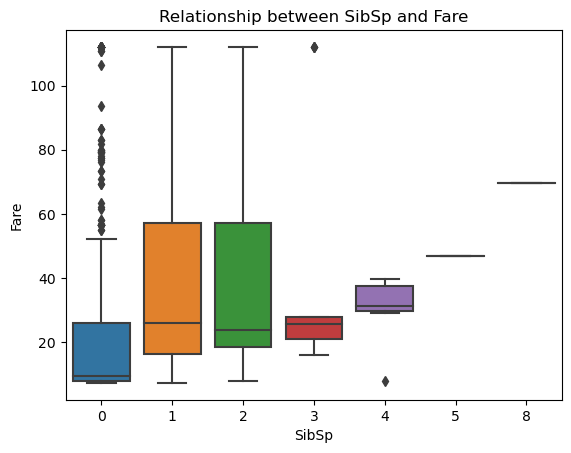

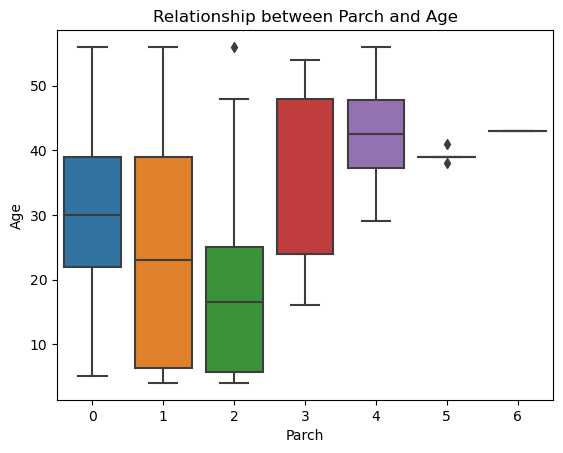

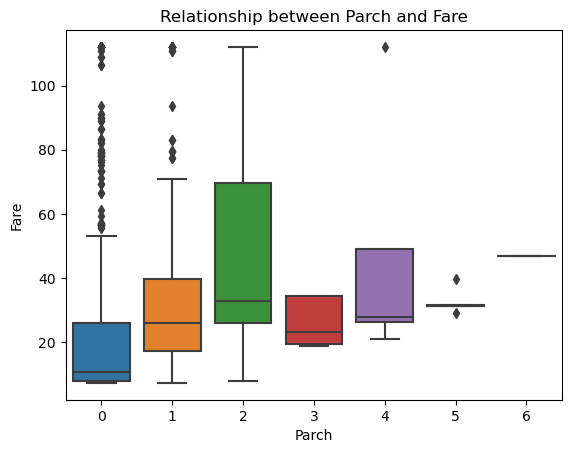

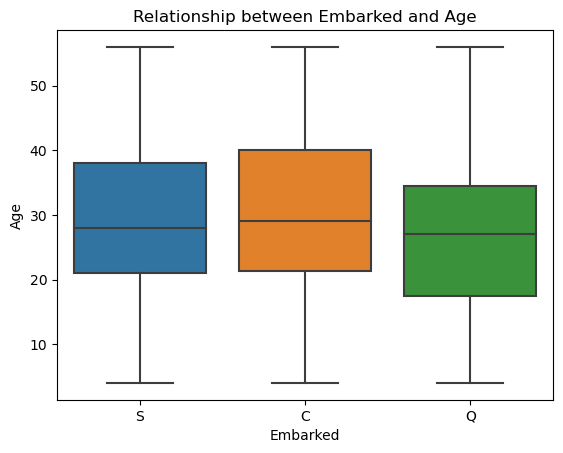

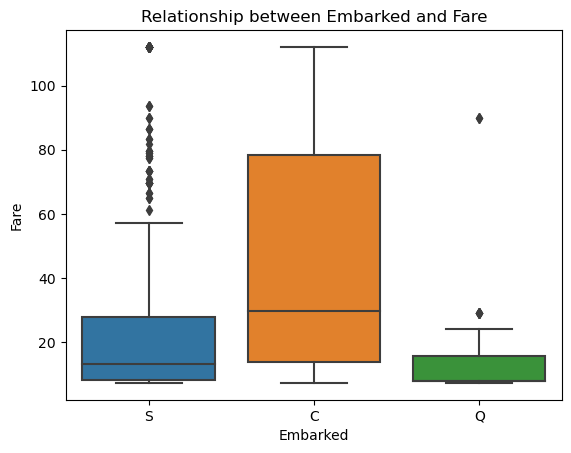

In [85]:
# Bivariate Analysis for numerical variables
def bivariate_analysis_numerical(df, x, y):
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'Relationship between {x} and {y}')
    plt.show()

# Bivariate Analysis for categorical-numerical variables
def bivariate_analysis_categorical_numerical(df, x, y):
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f'Relationship between {x} and {y}')
    plt.show()

# Perform bivariate analysis on numerical variables
numerical_columns = ['Age', 'Fare']
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        bivariate_analysis_numerical(titanic_df, numerical_columns[i], numerical_columns[j])

# Perform bivariate analysis on categorical-numerical variables
categorical_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical_columns = ['Age', 'Fare']
for column in categorical_columns:
    for numerical_column in numerical_columns:
        bivariate_analysis_categorical_numerical(titanic_df, column, numerical_column)

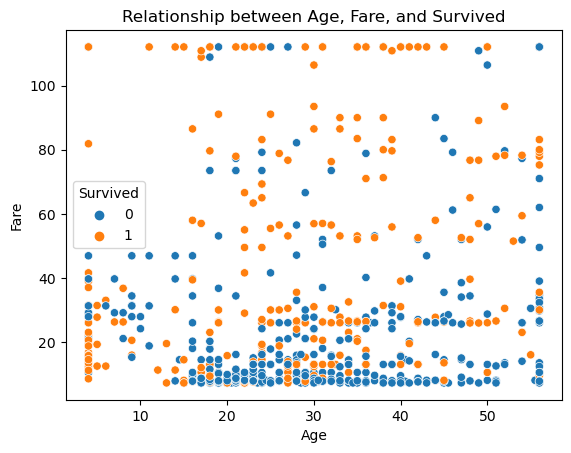

In [86]:
# Multivariate Analysis
def multivariate_analysis(df, x, y, z):
    sns.scatterplot(data=df, x=x, y=y, hue=z)
    plt.title(f'Relationship between {x}, {y}, and {z}')
    plt.show()

# Perform multivariate analysis
multivariate_analysis(titanic_df, 'Age', 'Fare', 'Survived')

#### 7. Apply feature scaling technique on suitable attribute.

In [88]:
# Apply feature scaling on suitable attribute
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [91]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.502946,1,0,-0.800354,2
2,1,3,0,-0.203438,0,0,-0.750004,2
3,1,1,0,0.470455,1,0,2.619710,2
4,0,3,1,0.470455,0,0,-0.740680,2
5,0,3,1,NaN,0,0,-0.710224,1
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.128561,0,0,-0.371448,2
887,1,1,0,-0.727577,0,0,0.896624,2
888,0,3,0,NaN,1,2,0.408044,2
889,1,1,1,-0.203438,0,0,0.896624,0


#### 8. Split the dataset in the ratio of 80:20

In [90]:
# Split the dataset in the ratio of 80:20
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X_train.shape

(620, 7)

In [93]:
 X_test.shape

(155, 7)

In [94]:
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64